In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('gene_expression_ml.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<Axes: xlabel='Gene One', ylabel='Gene Two'>

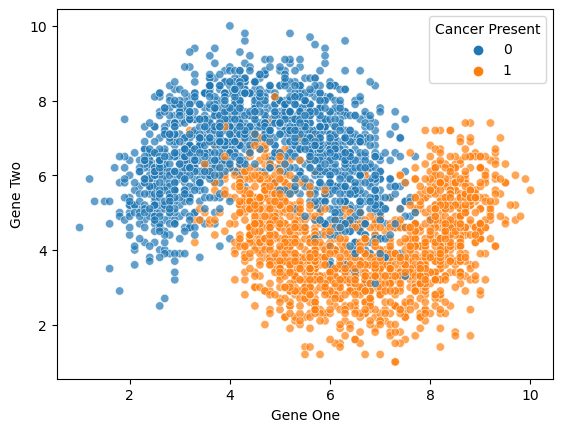

In [75]:
sns.scatterplot(x = "Gene One", y = 'Gene Two', data = df, hue = 'Cancer Present',alpha=0.7)

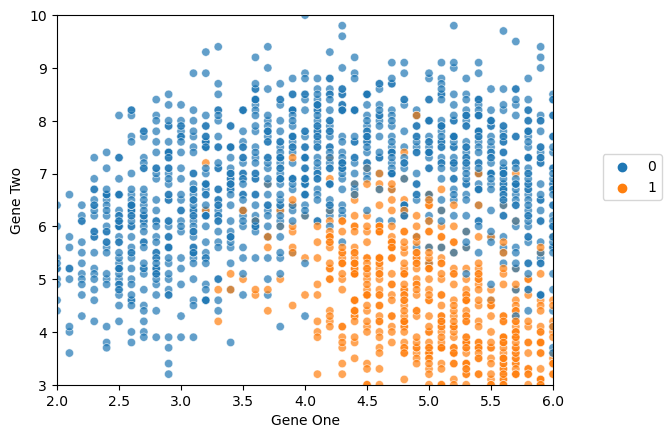

In [76]:
sns.scatterplot(x = "Gene One", y = 'Gene Two', data = df, hue = 'Cancer Present',alpha=0.7)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

###### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split


In [78]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [80]:
X_train.shape

(2100, 2)

###### Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test) #Prevent Data Leakage

###### KNN model

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [86]:
knn_model.fit(sc_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

###### Model Evaluation

In [87]:
y_pred = knn_model.predict(sc_X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [89]:
accuracy_score(y_test,y_pred)

0.9122222222222223

In [90]:
confusion_matrix(y_test,y_pred)

array([[379,  44],
       [ 35, 442]])

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.91      0.93      0.92       477

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



###### Elbow Methods for Choosing Reasonable K Values

* Note : This always use the test set for the hyperparamter selection i.e. K

In [92]:
test_error_rates = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(sc_X_train,y_train)
    
    y_pred_test = knn.predict(sc_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [93]:
test_error_rates

[0.08777777777777773,
 0.09111111111111114,
 0.06999999999999995,
 0.06555555555555559,
 0.06555555555555559,
 0.06000000000000005,
 0.06333333333333335,
 0.06444444444444442,
 0.06555555555555559,
 0.06444444444444442,
 0.06777777777777783,
 0.06444444444444442,
 0.06666666666666665,
 0.06444444444444442,
 0.06777777777777783,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06333333333333335,
 0.06222222222222218,
 0.06555555555555559,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.061111111111111116]

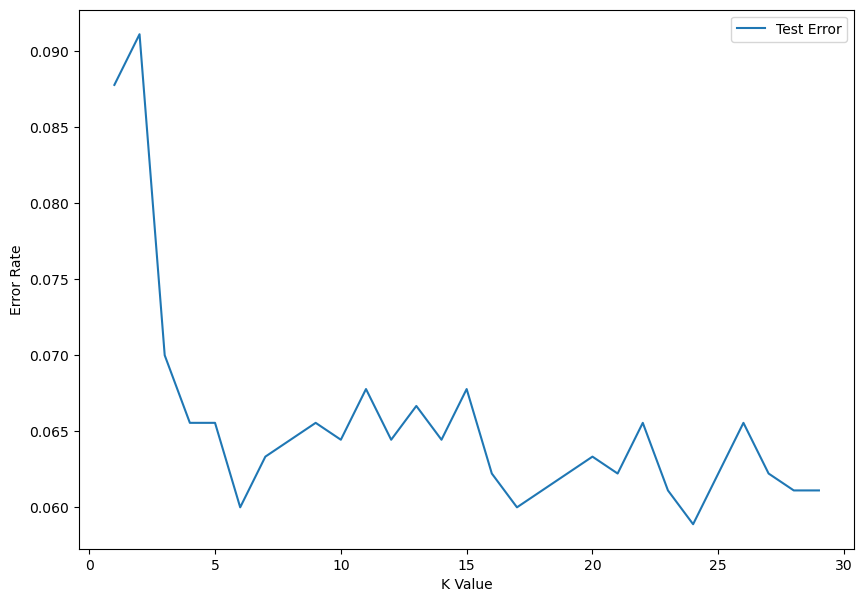

In [94]:
plt.figure(figsize=(10,7))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.show()

### Full Cross Validation Grid Search

###### Creating a Pipeline to find K value

In [95]:
scaler = StandardScaler()

In [96]:
knn = KNeighborsClassifier()

In [97]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [98]:
operations = [('scaler',scaler),('knn',knn)]

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pipe = Pipeline(operations)

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
k_values = list(range(1,20))

In [103]:
param_grid = {'knn__n_neighbors':k_values}

* Note : If your parameter grid is going inside a PipeLine, your parameter name needs to be in following format only:

1. chosen_string_name + two underscores + parameter key name
2. model_name+ __ + paramter name
3. knn+ __ + n_neighbors
4. knn__n_neighbors

In [104]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 10, scoring='accuracy')

In [105]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [106]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [107]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.8947619 , 0.90619048, 0.91904762, 0.91809524, 0.9252381 ,
       0.92619048, 0.92428571, 0.92619048, 0.92809524, 0.92809524,
       0.92761905, 0.92809524, 0.92857143, 0.92857143, 0.92952381,
       0.92952381, 0.93047619, 0.93285714, 0.93142857])

###### Final Model

In [108]:
scaler = StandardScaler()
knn18 = KNeighborsClassifier(n_neighbors=18)
operations = [('scaler',scaler),('knn18',knn18)]
pipe = Pipeline(operations)

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn18', KNeighborsClassifier(n_neighbors=18))])

In [111]:
pipe_pred = pipe.predict(X_test)

In [112]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [115]:
single_sample = X_test.iloc[40]

In [116]:
single_sample

Gene One    9.1
Gene Two    6.0
Name: 2487, dtype: float64

In [118]:
pipe.predict([[9.1,6.0]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [119]:
pipe.predict_proba([[9.1,6.0]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [120]:
pipe.predict([[8.0,1.0]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [127]:
pipe.predict_proba([[6,14.4]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])